**Sprint 2**

**Team id:PNT2022TMID23122**

**Model Building**

Importing required libraries

In [ ]:
import numpy
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils

Loading the data

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Analysing the data

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

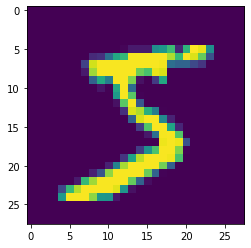

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

Reshaping the data

In [ ]:
X_train=X_train.reshape(60000,28,28,1).astype('float32')
X_test=X_test.reshape(10000,28,28,1).astype('float32')

Applying one hot encoding

In [ ]:
number_of_classes=10
y_train=np_utils.to_categorical(y_train,number_of_classes)
y_test=np_utils.to_categorical(y_test,number_of_classes)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Adding CNN layers

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes,activation='softmax'))

Compiling the model

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

Train the model

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)


Epoch 1/5
1875/1875 [==============================] - 195s 103ms/step - loss: 0.2126 - accuracy: 0.9543 - val_loss: 0.0867 - val_accuracy: 0.9730
Epoch 2/5
1875/1875 [==============================] - 193s 103ms/step - loss: 0.0682 - accuracy: 0.9796 - val_loss: 0.0700 - val_accuracy: 0.9781
Epoch 3/5
1875/1875 [==============================] - 196s 105ms/step - loss: 0.0454 - accuracy: 0.9860 - val_loss: 0.0741 - val_accuracy: 0.9787
Epoch 4/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0378 - accuracy: 0.9883 - val_loss: 0.1219 - val_accuracy: 0.9750
Epoch 5/5
1875/1875 [==============================] - 201s 107ms/step - loss: 0.0286 - accuracy: 0.9909 - val_loss: 0.1148 - val_accuracy: 0.9763


Observing the metrics

In [ ]:
metrics=model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Test loss & Test Accuracy):")
print(metrics)

Metrics(Test loss & Test Accuracy):
[0.11479371041059494, 0.9763000011444092]


Test the model

In [ ]:
prediction=model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 109ms/step
[[4.21976367e-19 2.76640418e-21 1.07767846e-13 4.71178166e-11
  2.10180035e-22 1.09333558e-23 3.61171152e-26 1.00000000e+00
  6.55367672e-18 5.30832922e-15]
 [1.43194623e-10 1.67714037e-11 9.99998331e-01 1.29229049e-12
  2.77214423e-15 6.86406363e-20 1.72249804e-06 5.78033124e-16
  6.75309364e-10 1.71233192e-21]
 [1.41170897e-09 9.99998927e-01 9.63970237e-09 3.00579769e-11
  4.58667927e-07 1.44993351e-08 1.61555591e-09 6.39673292e-09
  6.12086751e-07 4.38722626e-12]
 [1.00000000e+00 1.69338509e-15 1.90748825e-13 5.08622956e-16
  4.55195029e-16 3.16392081e-14 1.27083393e-08 5.42493669e-14
  6.74359917e-12 2.46589225e-11]]


In [ ]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Save the model

In [ ]:
model.save('models/handwritten_digit_recognition_system.h5')

Test with saved model

X_train:(60000, 28, 28)
y_train:(60000,)
X_test:(10000, 28, 28)
y_test:(10000,)


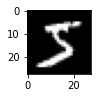

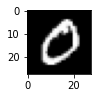

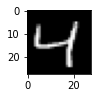

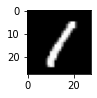

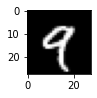

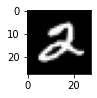

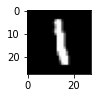

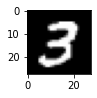

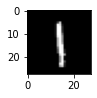

In [ ]:
from keras.datasets import mnist
from matplotlib import pyplot
(X_train,y_train),(X_test,y_test)=mnist.load_data()
print('X_train:' +str(X_train.shape))
print('y_train:' +str(y_train.shape))
print('X_test:' +str(X_test.shape))
print('y_test:' +str(y_test.shape))
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(330+1+i)
  pyplot.imshow(X_train[i],cmap=pyplot.get_cmap('gray'))
  pyplot.show()